In [1]:
import numpy as np

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv('nabil.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the DataFrame by 'Date' in ascending order
data.sort_values(by='Date', ascending=True, inplace=True)


In [4]:

# Inspect the first few rows of the dataset
print(data.head())


     Symbol       Date    Open    High     Low   Close Percent Change  \
2205  NABIL 2014-01-01  2210.0  2180.0  2142.0  2151.0        -2.67 %   
2204  NABIL 2014-01-02  2151.0  2150.0  2090.0  2125.0        -1.21 %   
2203  NABIL 2014-01-05  2125.0  2125.0  2100.0  2125.0         0.00 %   
2202  NABIL 2014-01-06  2125.0  2118.0  2095.0  2110.0        -0.71 %   
2201  NABIL 2014-01-07  2110.0  2135.0  2070.0  2126.0         0.76 %   

         Volume  
2205     433.00  
2204  10,110.00  
2203   5,113.00  
2202   3,381.00  
2201   4,731.00  


In [5]:
data.tail()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
4,NABIL,2023-08-24,595.0,600.0,591.1,592.5,-1.09 %,"43,106.00"
3,NABIL,2023-08-27,592.5,595.0,589.1,590.0,-0.42 %,"45,941.00"
2,NABIL,2023-08-28,596.0,596.0,590.0,590.1,0.02 %,"25,988.00"
1,NABIL,2023-08-29,592.1,596.0,588.1,590.0,-0.02 %,"29,237.00"
0,NABIL,2023-08-30,596.0,596.0,586.2,587.3,-0.46 %,"51,037.00"


In [6]:
##data cleaning

data['Percent Change'] = pd.to_numeric(data['Percent Change'].str.replace('%', '', regex=False), errors='coerce')
#Find rows with NaN values in 'Percent Change' column
rows_with_nan = data[data['Percent Change'].isna()]

# Calculate and replace NaN values with the formula=%change=(old_closng-new_closing/old_closing) mentioned
for index, row in rows_with_nan.iterrows():
    if index > 0:
        prev_row = data.loc[index - 1]
        data.at[index, 'Percent Change'] = (row['Close'] - prev_row['Close']) / row['Close']


# Clean 'Volume' column (remove commas and convert to float)
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)


In [7]:
data.isnull().sum()

Symbol            0
Date              0
Open              0
High              0
Low               0
Close             0
Percent Change    0
Volume            0
dtype: int64

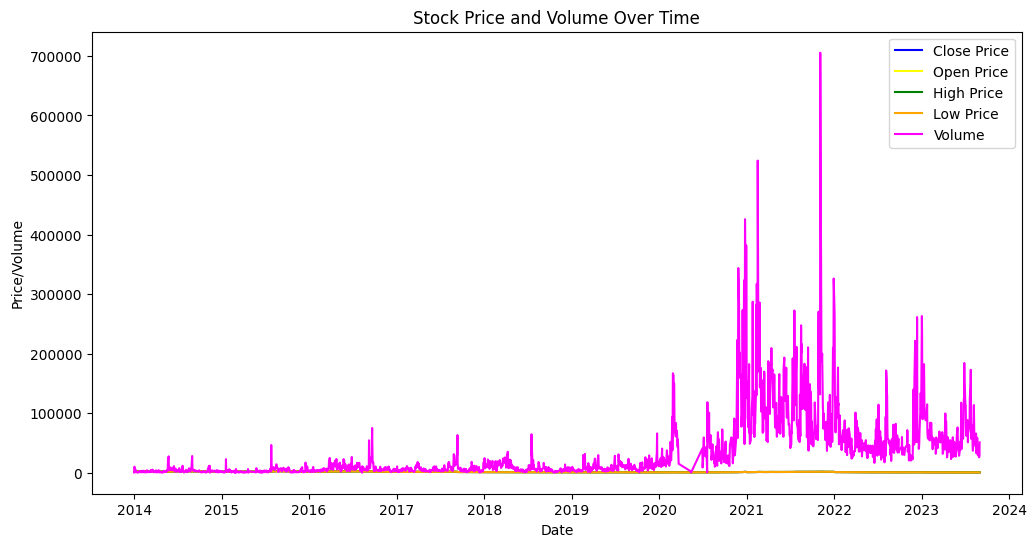

In [8]:
# Line plot of stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['Open'], label='Open Price', color='yellow')
plt.plot(data['Date'], data['High'], label='High Price', color='green')
plt.plot(data['Date'], data['Low'], label='Low Price', color='orange')
plt.plot(data['Date'], data['Volume'], label='Volume', color='magenta')
plt.xlabel('Date')
plt.ylabel('Price/Volume')
plt.title('Stock Price and Volume Over Time')
plt.legend()
plt.show()


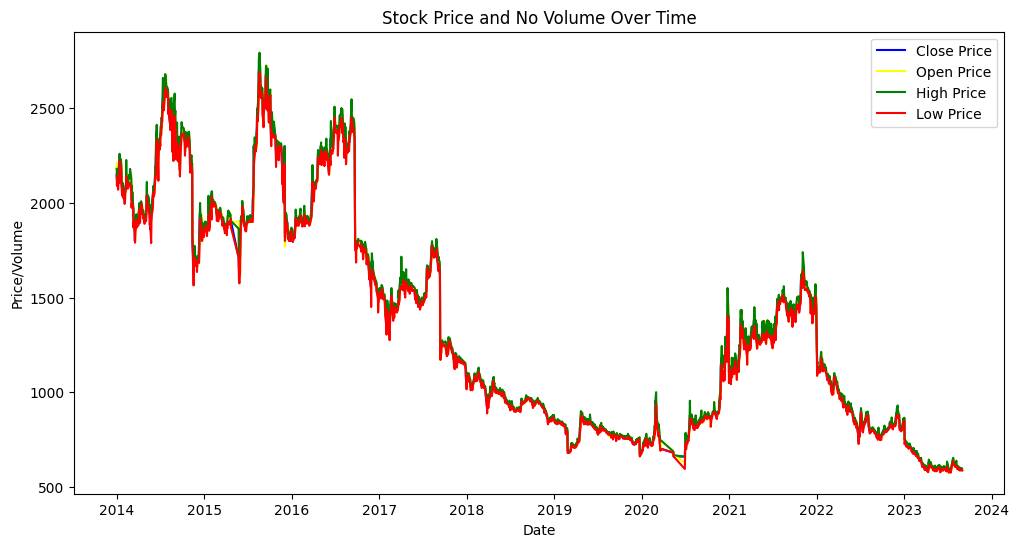

In [9]:
# Line plot of stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['Open'], label='Open Price', color='yellow')
plt.plot(data['Date'], data['High'], label='High Price', color='green')
plt.plot(data['Date'], data['Low'], label='Low Price', color='red')

plt.xlabel('Date')
plt.ylabel('Price/Volume')
plt.title('Stock Price and No Volume Over Time')
plt.legend()
plt.show()


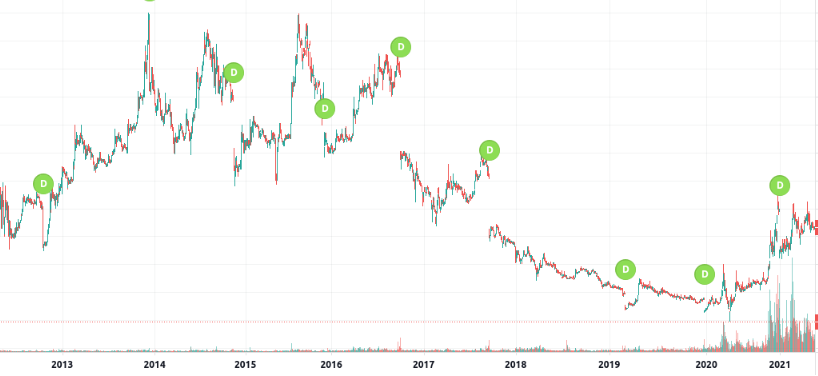

In [10]:
##save chart 

In [11]:
##adding attributes

In [12]:
#1        #tomorrow going to raise?
#2        # nuber of holidays before today price(heiristics, sunday is usually more raise due to saturday)
#3        #technical indicators=[moving average, RSI, MACD, bollinger band, average directional index(ADX)]

# Shift the 'Close' column one row down to get tomorrow's price
data['Next_Day_Close'] = data['Close'].shift(-1)

# Create a new column 'Is_Tomorrow_High' bon
data['Is_Tomorrow_High'] = (data['Next_Day_Close'] > data['Close']).astype(int)

# Drop the 'Next_Day_Close' column if you no longer need it
data.drop('Next_Day_Close', axis=1, inplace=True)

# Display the updated DataFrame
print(data.head())


     Symbol       Date    Open    High     Low   Close  Percent Change  \
2205  NABIL 2014-01-01  2210.0  2180.0  2142.0  2151.0           -2.67   
2204  NABIL 2014-01-02  2151.0  2150.0  2090.0  2125.0           -1.21   
2203  NABIL 2014-01-05  2125.0  2125.0  2100.0  2125.0            0.00   
2202  NABIL 2014-01-06  2125.0  2118.0  2095.0  2110.0           -0.71   
2201  NABIL 2014-01-07  2110.0  2135.0  2070.0  2126.0            0.76   

       Volume  Is_Tomorrow_High  
2205    433.0                 0  
2204  10110.0                 0  
2203   5113.0                 0  
2202   3381.0                 1  
2201   4731.0                 1  


In [13]:
# Calculate the number of days between current row and previous row's date, excluding weekends
data['Days_Before_Holidays'] = (data['Date'] - data['Date'].shift(1)).dt.days-1

# Fill potential NaN values in the first row with 0
data['Days_Before_Holidays'].fillna(0, inplace=True)

# Display the updated DataFrame
print(data.head())


     Symbol       Date    Open    High     Low   Close  Percent Change  \
2205  NABIL 2014-01-01  2210.0  2180.0  2142.0  2151.0           -2.67   
2204  NABIL 2014-01-02  2151.0  2150.0  2090.0  2125.0           -1.21   
2203  NABIL 2014-01-05  2125.0  2125.0  2100.0  2125.0            0.00   
2202  NABIL 2014-01-06  2125.0  2118.0  2095.0  2110.0           -0.71   
2201  NABIL 2014-01-07  2110.0  2135.0  2070.0  2126.0            0.76   

       Volume  Is_Tomorrow_High  Days_Before_Holidays  
2205    433.0                 0                   0.0  
2204  10110.0                 0                   0.0  
2203   5113.0                 0                   2.0  
2202   3381.0                 1                   0.0  
2201   4731.0                 1                   0.0  


In [14]:
#adding technical indicators to the dataset

In [15]:
pip install ta


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import ta

data['Date'] = pd.to_datetime(data['Date'])

# Sort the DataFrame by date in ascending order (important for TA calculations)
data.sort_values('Date', inplace=True)



In [17]:
data.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume,Is_Tomorrow_High,Days_Before_Holidays
2205,NABIL,2014-01-01,2210.0,2180.0,2142.0,2151.0,-2.67,433.0,0,0.0
2204,NABIL,2014-01-02,2151.0,2150.0,2090.0,2125.0,-1.21,10110.0,0,0.0
2203,NABIL,2014-01-05,2125.0,2125.0,2100.0,2125.0,0.00,5113.0,0,2.0
2202,NABIL,2014-01-06,2125.0,2118.0,2095.0,2110.0,-0.71,3381.0,1,0.0
2201,NABIL,2014-01-07,2110.0,2135.0,2070.0,2126.0,0.76,4731.0,1,0.0


In [18]:
df=data.copy()


In [19]:
data.index

Index([2205, 2204, 2203, 2202, 2201, 2200, 2199, 2198, 2197, 2196,
       ...
          9,    8,    7,    6,    5,    4,    3,    2,    1,    0],
      dtype='int64', length=2206)

In [20]:
#data.drop(columns=["MA_50"],inplace=True)

KeyError: "['MA_50'] not found in axis"

In [21]:
# Calculate Moving Averages (e.g., 10-day and 50-day)
data['MA_10'] = ta.trend.sma_indicator(data['Close'], window=10)

# Calculate Bollinger Bands
bollinger = ta.volatility.BollingerBands(data['Close'])
data['Bollinger_Middle'] = bollinger.bollinger_mavg()
data['Bollinger_Upper'] = bollinger.bollinger_hband()
data['Bollinger_Lower'] = bollinger.bollinger_lband()

# Calculate MACD
macd = ta.trend.MACD(data['Close'])
data['MACD'] = macd.macd()
data['Signal_Line'] = macd.macd_signal()

# Calculate Average Directional Index (ADX)
data['ADX'] = ta.trend.ADXIndicator(data['High'], data['Low'], data['Close']).adx()

# Display the updated DataFrame
print(data.head(30))


     Symbol       Date    Open    High     Low   Close  Percent Change  \
2205  NABIL 2014-01-01  2210.0  2180.0  2142.0  2151.0           -2.67   
2204  NABIL 2014-01-02  2151.0  2150.0  2090.0  2125.0           -1.21   
2203  NABIL 2014-01-05  2125.0  2125.0  2100.0  2125.0            0.00   
2202  NABIL 2014-01-06  2125.0  2118.0  2095.0  2110.0           -0.71   
2201  NABIL 2014-01-07  2110.0  2135.0  2070.0  2126.0            0.76   
2200  NABIL 2014-01-08  2126.0  2180.0  2100.0  2168.0            1.98   
2199  NABIL 2014-01-09  2168.0  2172.0  2125.0  2172.0            0.18   
2198  NABIL 2014-01-12  2172.0  2225.0  2105.0  2225.0            2.44   
2197  NABIL 2014-01-13  2225.0  2260.0  2225.0  2250.0            1.12   
2196  NABIL 2014-01-14  2250.0  2250.0  2220.0  2220.0           -1.33   
2195  NABIL 2014-01-16  2220.0  2230.0  2199.0  2199.0           -0.95   
2194  NABIL 2014-01-19  2199.0  2230.0  2190.0  2210.0            0.50   
2193  NABIL 2014-01-20  2210.0  2200.0

/home/sailesh/.local/lib/python3.10/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
/home/sailesh/.local/lib/python3.10/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


In [22]:
# Find the first non-NaN value in each column
first_non_nan = data.ffill().iloc[-1]

# Replace NaN values in columns 0 to i-1 with the first non-NaN value in the corresponding column
for col in range(data.shape[1]):
    data.iloc[:, col] = data.iloc[:, col].fillna(first_non_nan[col])


In [23]:
data.isnull().sum()

Symbol                  0
Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Percent Change          0
Volume                  0
Is_Tomorrow_High        0
Days_Before_Holidays    0
MA_10                   0
Bollinger_Middle        0
Bollinger_Upper         0
Bollinger_Lower         0
MACD                    0
Signal_Line             0
ADX                     0
dtype: int64

In [24]:
data.index

Index([2205, 2204, 2203, 2202, 2201, 2200, 2199, 2198, 2197, 2196,
       ...
          9,    8,    7,    6,    5,    4,    3,    2,    1,    0],
      dtype='int64', length=2206)

In [25]:
data.to_csv("nabil_tech_ind.csv",index=False)

In [101]:
from sklearn.model_selection import train_test_split
# Define the columns for X (features) and y (target)
X_columns = ['Open', 'High', 'Low', 'Volume', 'MA_10', 'bb_bbm', 'bb_bbh', 'bb_bbl', 'Bollinger_Middle', 'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal_Line', 'ADX']
y_column = 'Close'

# Create X (features) and y (target)
X = data[X_columns]
y = data[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
print(f'Linear Regression RMSE: {lr_rmse}')


Linear Regression RMSE: 11.92895951769997


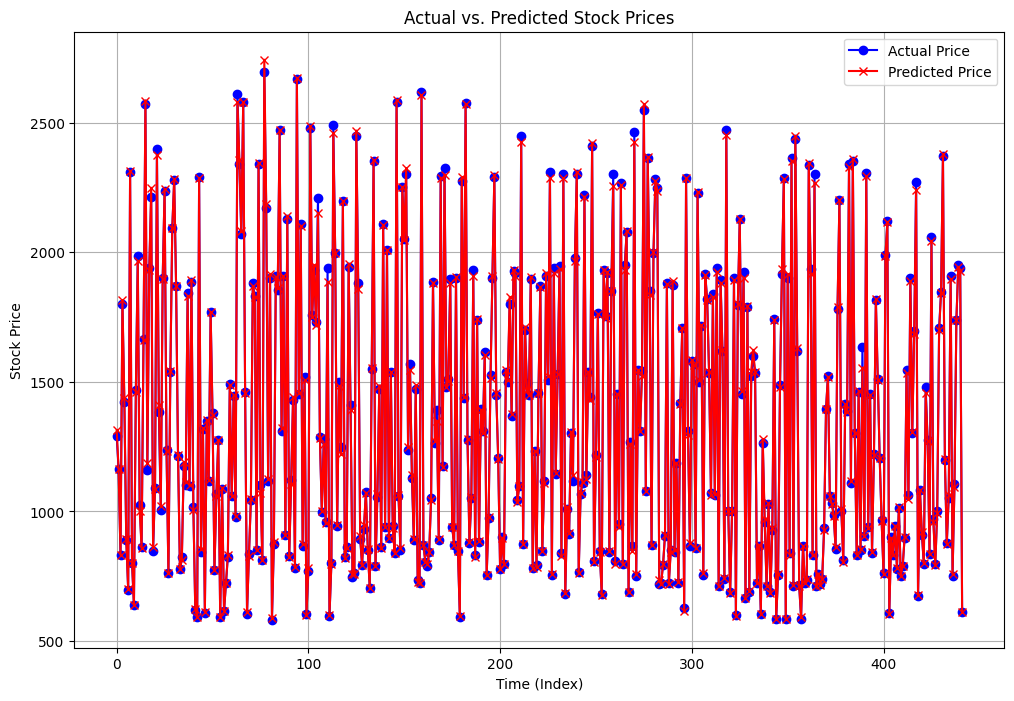

In [103]:
import matplotlib.pyplot as plt



# Create an array of numerical indices for the x-axis
x_indices = np.arange(len(y_test))

# Plot the actual vs. predicted stock prices using indices along the x-axis
plt.figure(figsize=(12, 8))
plt.plot(x_indices, y_test, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices, lr_predictions, label='Predicted Price', color='red', marker='x')
plt.xlabel('Time (Index)')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


Degree2, and Polynomial Regression RMSE: 10.87696736666903


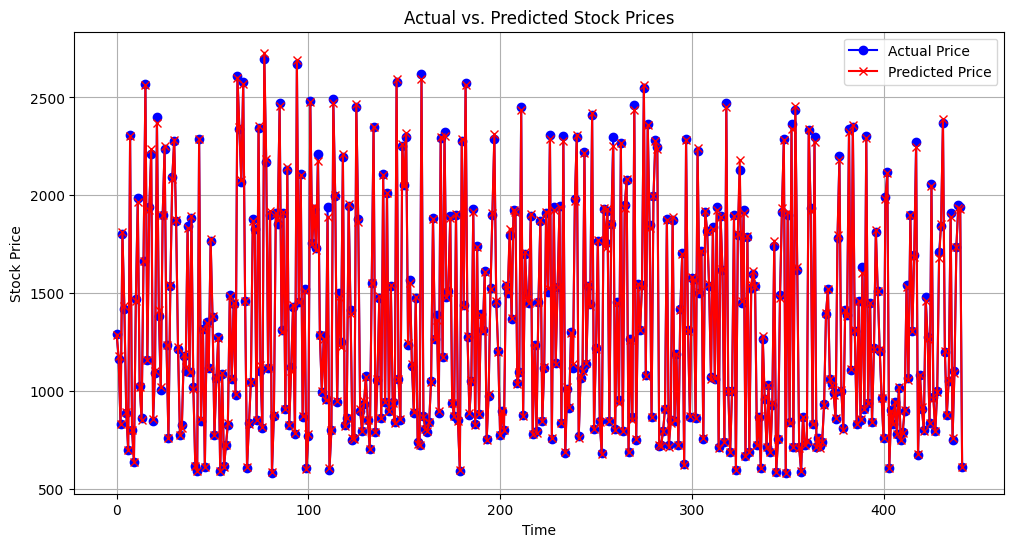

Degree3, and Polynomial Regression RMSE: 41.942116352060175


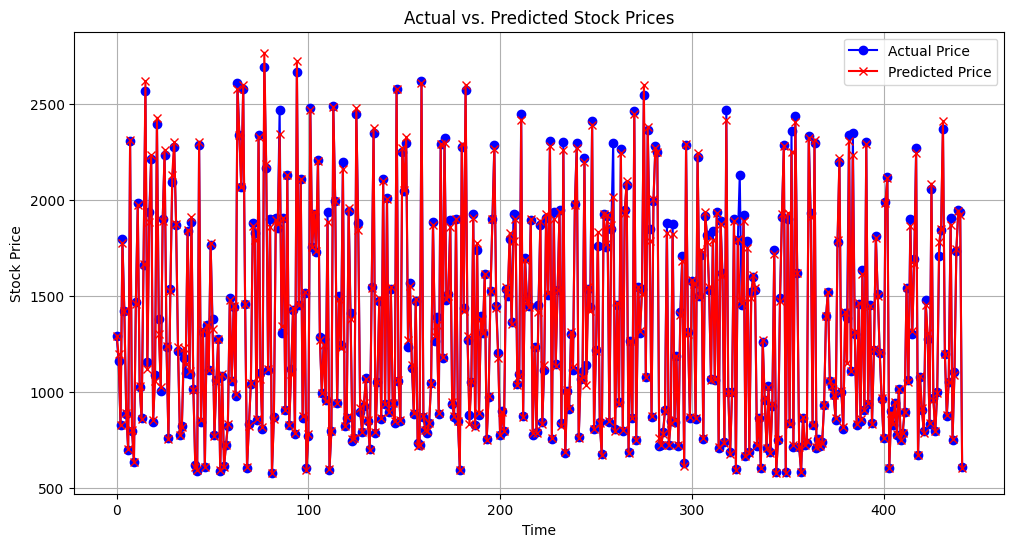

Degree4, and Polynomial Regression RMSE: 402.0165551453089


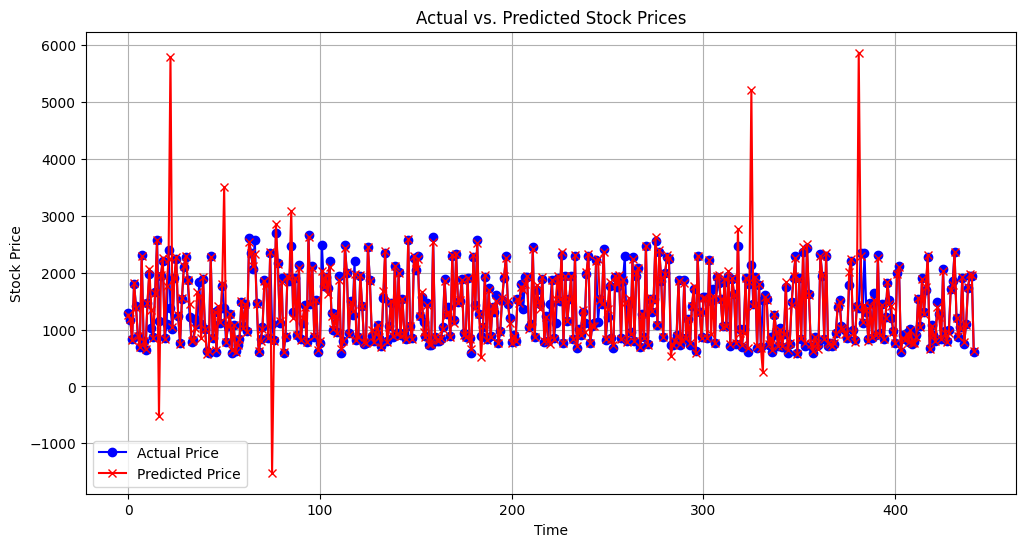

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a Polynomial Regression model
for degree in range(2,10):# = 2  # You can adjust the degree of the polynomial
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X_train, y_train)

    # Make predictions
    polyreg_predictions = polyreg.predict(X_test)

    # Evaluate the model
    polyreg_rmse = mean_squared_error(y_test, polyreg_predictions, squared=False)
    print(f'Degree{degree}, and Polynomial Regression RMSE: {polyreg_rmse}')



    # Plot the actual vs. predicted stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(x_indices,y_test, label='Actual Price', color='blue', marker='o')
    plt.plot(x_indices,polyreg_predictions, label='Predicted Price', color='red', marker='x')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Actual vs. Predicted Stock Prices')
    plt.legend()
    plt.grid(True)
    plt.show()


SVM RMSE: 302.13757962210536


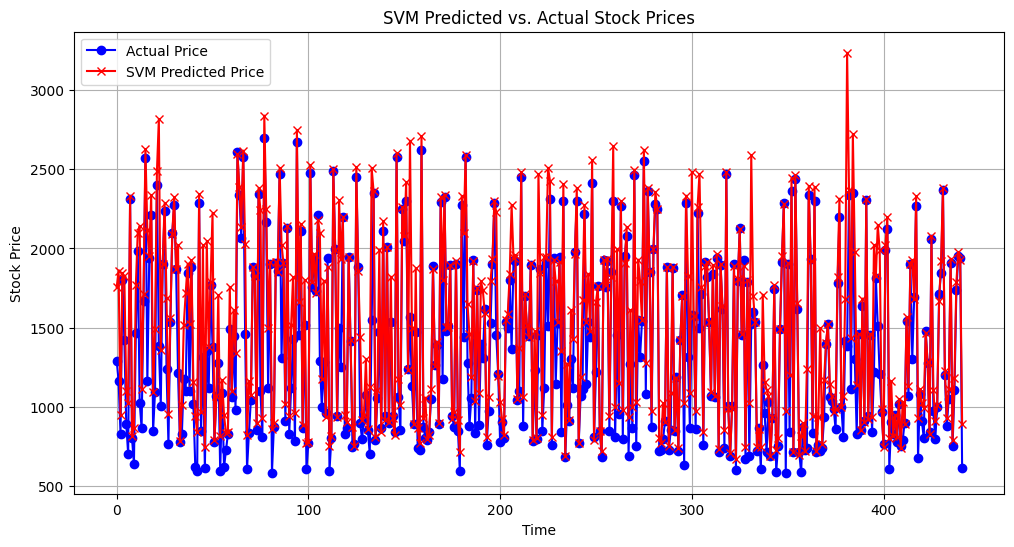

In [63]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and train an SVM regression model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
print(f'SVM RMSE: {svm_rmse}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(x_indices,y_test.values, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices,svm_predictions, label='SVM Predicted Price', color='red', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('SVM Predicted vs. Actual Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:03
Note: you may need to restart the kernel to use updated packages.


XGBoost RMSE: 14.793265124012526


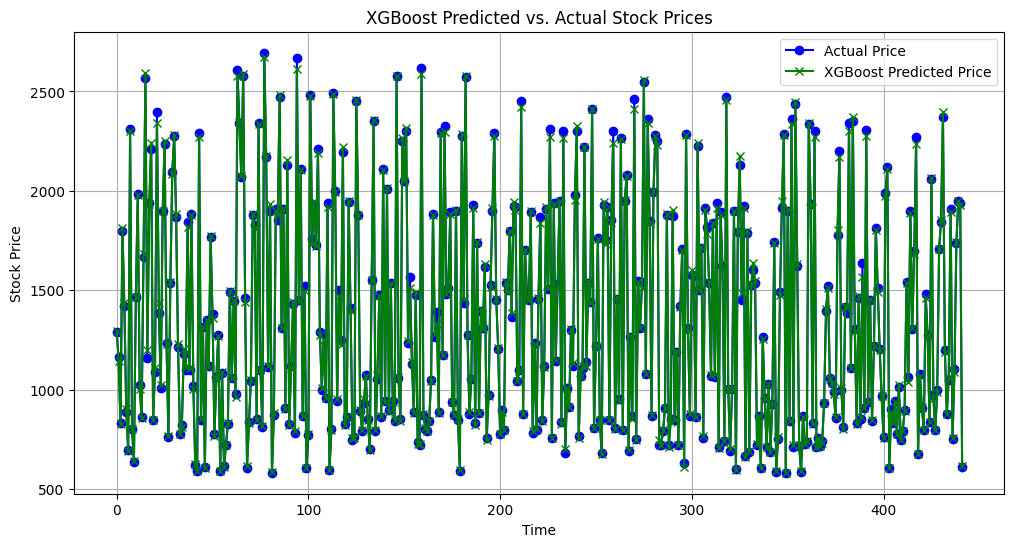

In [66]:
import xgboost as xgb

# Create and train an XGBoost regression model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print(f'XGBoost RMSE: {xgb_rmse}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(x_indices,y_test.values, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices,xgb_predictions, label='XGBoost Predicted Price', color='green', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('XGBoost Predicted vs. Actual Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


AdaBoost RMSE: 49.39732957673735


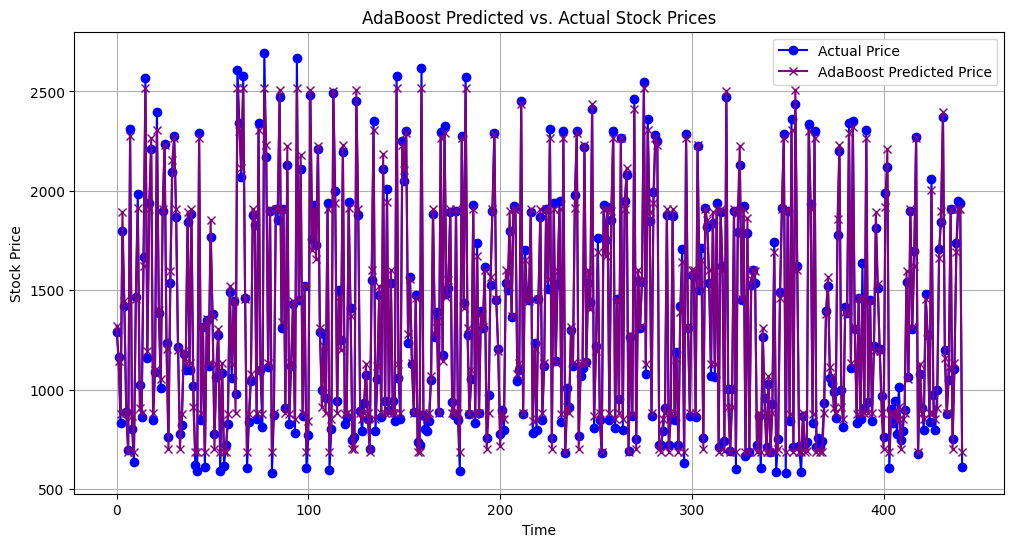

In [67]:
from sklearn.ensemble import AdaBoostRegressor

# Create and train an AdaBoost regression model
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=0.1)
adaboost_model.fit(X_train, y_train)

# Make predictions
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluate the AdaBoost model
adaboost_rmse = mean_squared_error(y_test, adaboost_predictions, squared=False)
print(f'AdaBoost RMSE: {adaboost_rmse}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(x_indices,y_test.values, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices,adaboost_predictions, label='AdaBoost Predicted Price', color='purple', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('AdaBoost Predicted vs. Actual Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


2023-09-29 22:17:24.093015: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 22:17:24.124228: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-29 22:17:24.124292: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-29 22:17:24.124319: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-29 22:17:24.130199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 22:17:24.130612: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/100
56/56 - 1s - loss: 2111598.7500 - val_loss: 2182808.2500 - 854ms/epoch - 15ms/step
Epoch 2/100
56/56 - 0s - loss: 2079330.8750 - val_loss: 2100860.7500 - 105ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 1882343.1250 - val_loss: 1722033.0000 - 110ms/epoch - 2ms/step
Epoch 4/100
56/56 - 0s - loss: 1299102.7500 - val_loss: 926871.6875 - 118ms/epoch - 2ms/step
Epoch 5/100
56/56 - 0s - loss: 562190.9375 - val_loss: 306516.8125 - 115ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 202157.7812 - val_loss: 148944.7188 - 107ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 138230.3750 - val_loss: 125480.4609 - 108ms/epoch - 2ms/step
Epoch 8/100
56/56 - 0s - loss: 117071.5938 - val_loss: 104591.4219 - 108ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 96345.3438 - val_loss: 84455.1016 - 114ms/epoch - 2ms/step
Epoch 10/100
56/56 - 0s - loss: 76139.1719 - val_loss: 65172.7461 - 109ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 59427.1094 - val_loss: 51426.0195 - 114ms/e

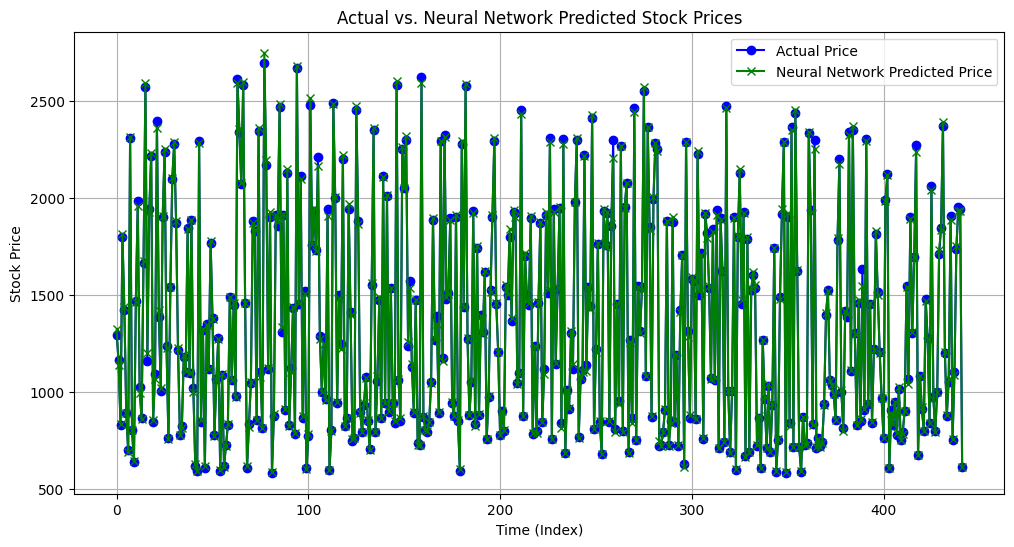

Epoch 1/100
56/56 - 1s - loss: 2090710.6250 - val_loss: 2078436.0000 - 825ms/epoch - 15ms/step
Epoch 2/100
56/56 - 0s - loss: 1379094.2500 - val_loss: 355260.5625 - 112ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 182159.8750 - val_loss: 135924.0000 - 113ms/epoch - 2ms/step
Epoch 4/100
56/56 - 0s - loss: 112353.2500 - val_loss: 86143.4766 - 115ms/epoch - 2ms/step
Epoch 5/100
56/56 - 0s - loss: 72389.2734 - val_loss: 53463.9766 - 136ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 46118.2578 - val_loss: 34965.4102 - 112ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 33090.5273 - val_loss: 25178.9238 - 110ms/epoch - 2ms/step
Epoch 8/100
56/56 - 0s - loss: 24709.3906 - val_loss: 19018.3555 - 115ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 18837.1816 - val_loss: 14151.7217 - 113ms/epoch - 2ms/step
Epoch 10/100
56/56 - 0s - loss: 14124.5615 - val_loss: 10473.6377 - 114ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 10804.0771 - val_loss: 8249.9531 - 112ms/epoch - 2ms/ste

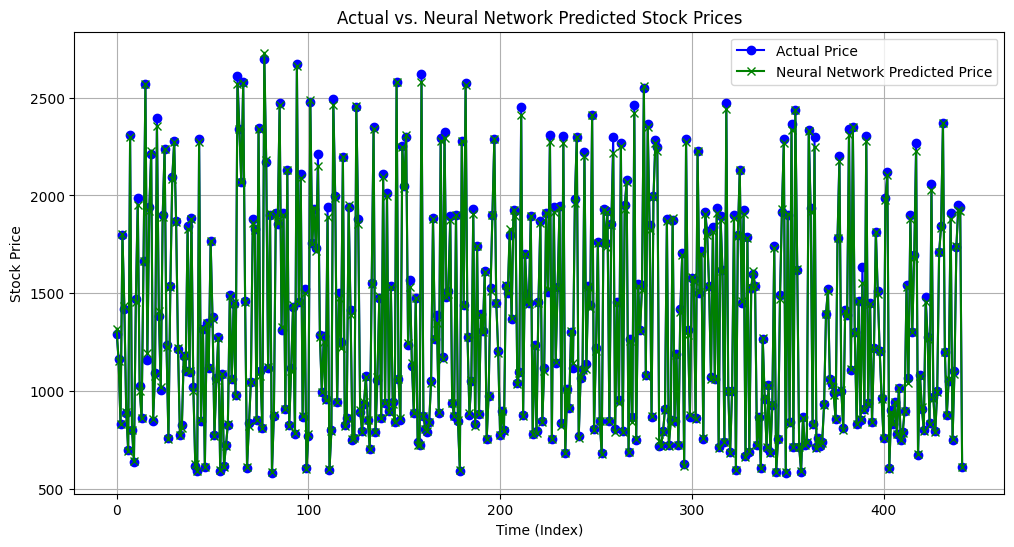

Epoch 1/100
56/56 - 1s - loss: 1957793.8750 - val_loss: 1120548.7500 - 908ms/epoch - 16ms/step
Epoch 2/100
56/56 - 0s - loss: 272471.5312 - val_loss: 118545.8203 - 125ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 90720.6797 - val_loss: 58777.3906 - 163ms/epoch - 3ms/step
Epoch 4/100
56/56 - 0s - loss: 47139.1602 - val_loss: 35043.7461 - 130ms/epoch - 2ms/step
Epoch 5/100
56/56 - 0s - loss: 27190.9609 - val_loss: 20138.1289 - 125ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 16254.6172 - val_loss: 10305.1562 - 140ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 9770.3457 - val_loss: 7250.3960 - 138ms/epoch - 2ms/step
Epoch 8/100
56/56 - 0s - loss: 6342.0435 - val_loss: 4031.9998 - 128ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 4063.3274 - val_loss: 2633.4329 - 133ms/epoch - 2ms/step
Epoch 10/100
56/56 - 0s - loss: 2640.3840 - val_loss: 1849.6820 - 134ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 1897.1393 - val_loss: 1217.3162 - 129ms/epoch - 2ms/step
Epoch 12/10

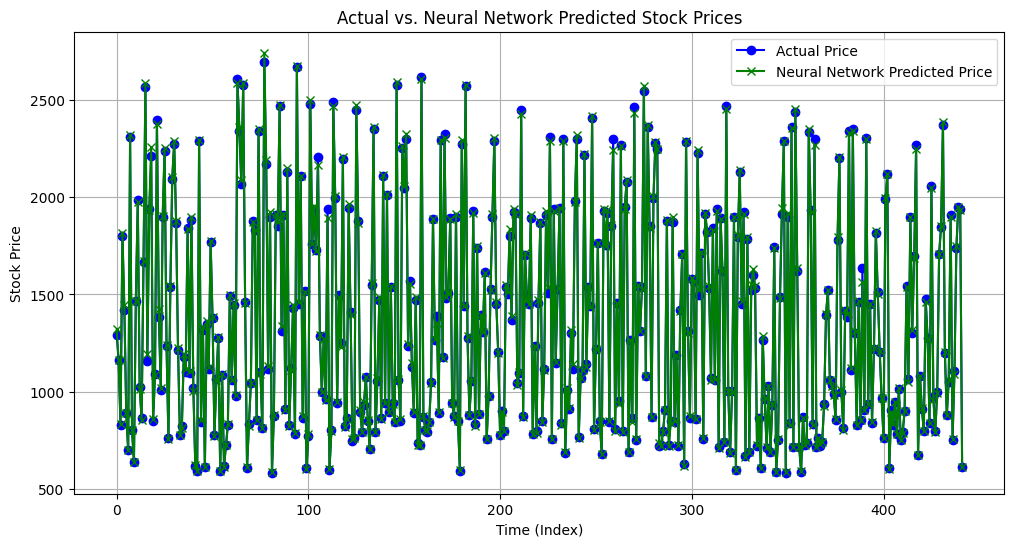

In [71]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset and preprocess it as needed
# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model with three hidden layers
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

x_indices = np.arange(len(y_test))

for model in [model1,model2,model3]:
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)
    
    # Make predictions
    nn_predictions = model.predict(X_test)
    
    # Evaluate the model
    nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
    print(f'Neural Network RMSE: {nn_rmse}')
    
    # Plot actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(x_indices,y_test, label='Actual Price', color='blue', marker='o')
    plt.plot(x_indices,nn_predictions, label='Neural Network Predicted Price', color='green', marker='x')
    plt.xlabel('Time (Index)')
    plt.ylabel('Stock Price')
    plt.title('Actual vs. Neural Network Predicted Stock Prices')
    plt.legend()
    plt.grid(True)
    plt.show()


In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset and preprocess it as needed
# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:

# Standardize the input features (recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [74]:

# Reshape the data for the RNN (sequence_length, num_features)
sequence_length = 10  # You can adjust this window size
X_train_reshaped = np.array([X_train[i:i+sequence_length] for i in range(len(X_train) - sequence_length)])
X_test_reshaped = np.array([X_test[i:i+sequence_length] for i in range(len(X_test) - sequence_length)])
y_train_reshaped = y_train[sequence_length:]
y_test_reshaped = y_test[sequence_length:]


In [75]:

# Create an RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(sequence_length, X_train.shape[1])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])


In [76]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [77]:

# Train the model
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test_reshaped), verbose=2)


Epoch 1/100
55/55 - 1s - loss: 1436649.8750 - val_loss: 435262.7812 - 1s/epoch - 20ms/step
Epoch 2/100
55/55 - 0s - loss: 442848.2812 - val_loss: 399787.0312 - 161ms/epoch - 3ms/step
Epoch 3/100
55/55 - 0s - loss: 412004.3438 - val_loss: 409543.7812 - 168ms/epoch - 3ms/step
Epoch 4/100
55/55 - 0s - loss: 404412.4375 - val_loss: 368368.2812 - 159ms/epoch - 3ms/step
Epoch 5/100
55/55 - 0s - loss: 378809.9688 - val_loss: 410608.0312 - 169ms/epoch - 3ms/step
Epoch 6/100
55/55 - 0s - loss: 373313.7188 - val_loss: 353387.0312 - 156ms/epoch - 3ms/step
Epoch 7/100
55/55 - 0s - loss: 362948.5625 - val_loss: 344139.5938 - 187ms/epoch - 3ms/step
Epoch 8/100
55/55 - 0s - loss: 350542.4375 - val_loss: 348548.9688 - 182ms/epoch - 3ms/step
Epoch 9/100
55/55 - 0s - loss: 349456.5625 - val_loss: 333046.8750 - 175ms/epoch - 3ms/step
Epoch 10/100
55/55 - 0s - loss: 353228.4375 - val_loss: 355337.5625 - 158ms/epoch - 3ms/step
Epoch 11/100
55/55 - 0s - loss: 357987.8438 - val_loss: 352434.8438 - 187ms/epoc

In [79]:

# Make predictions
rnn_predictions = model.predict(X_test_reshaped)

# Evaluate the model
rnn_rmse = np.sqrt(mean_squared_error(y_test_reshaped, rnn_predictions))
print(f'RNN RMSE: {rnn_rmse}')


14/14 [==============================] - 0s 2ms/step
RNN RMSE: 586.6977888390085


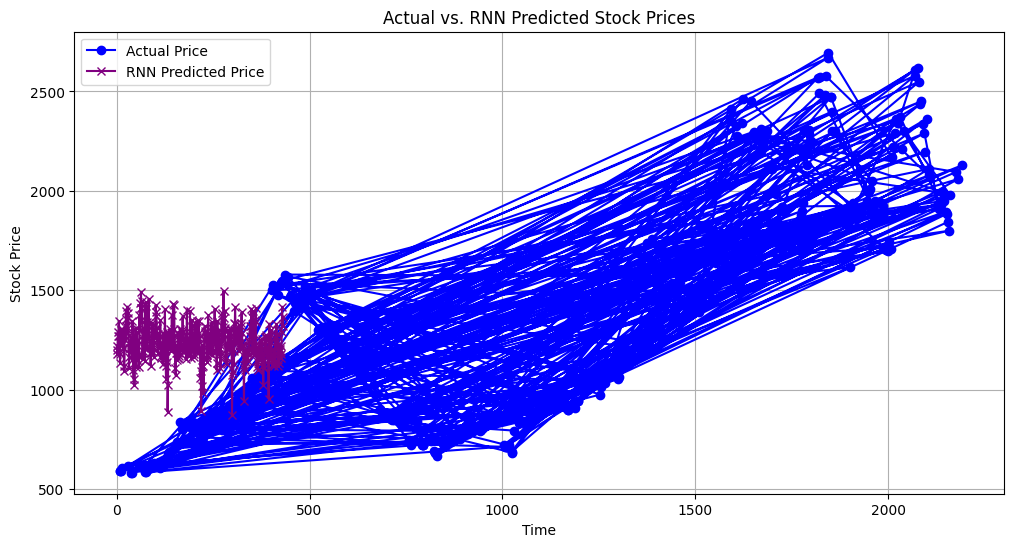

In [80]:

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_reshaped, label='Actual Price', color='blue', marker='o')
plt.plot(rnn_predictions, label='RNN Predicted Price', color='purple', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. RNN Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()
